# 感知机

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['label'] = iris.target

df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
# print(df[:50])

In [3]:
X = np.array(df.iloc[:100, [0,1]])
y = np.array(df.iloc[:100, [-1]])
y = np.array([1 if i == 1 else -1 for i in y[:,-1]])

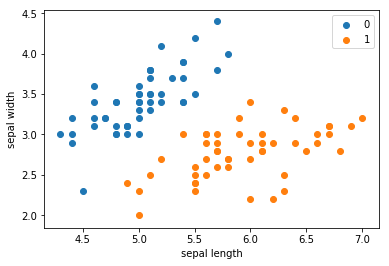

In [4]:
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

## 感知机学习算法的原始形式

In [5]:
class Model:
    def __init__(self, learning_rate=0.1):
        self.w = np.ones(2, dtype=np.float32)
        self.b = 0
        self.learning_rate = learning_rate
    
    def sign(self, w, b, x):
        y = np.dot(x, w)+ b
        if y>=0:
            return 1
        else:
            return -1
    
    def fit(self, X, y):
        flag = False
        while not flag:
            wrong_count = 0
            for i in range(len(X)):
                xx = X[i]
                yy = y[i]
                if yy * (np.dot(xx, self.w)+ self.b) <= 0:
                    self.w = self.w + self.learning_rate*np.dot(yy, xx)
                    self.b = self.b + self.learning_rate*yy
                    wrong_count += 1
            if wrong_count == 0:
                flag = True
                print("done")

In [6]:
perceptron = Model(1)
perceptron.fit(X, y)

done


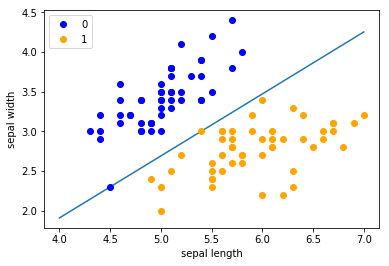

In [7]:
x_points = np.linspace(4, 7,10)
y_ = -(perceptron.w[0]*x_points + perceptron.b)/perceptron.w[1]
plt.plot(x_points, y_)

plt.plot(X[:50, 0], X[:50, 1], 'bo', color='blue', label='0')
plt.plot(X[50:100, 0], X[50:100, 1], 'bo', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

## 感知机学习算法的对偶形式

In [8]:
X = np.array(df.iloc[:100, [0,1]])
y = np.array(df.iloc[:100, [-1]])
y = np.array([1 if i == 1 else -1 for i in y[:,-1]])

class Model_dual:
    def __init__(self, learning_rate= 1):
        self.w = [0,0] # np.ones(2, dtype=np.float64)
        self.b = 0
        self.alpha = [0 for i in range(len(X))]
        self.learning_rate = learning_rate
    
    def fit(self, X, y):
        gram = np.matmul(X,X.T)
        flag = False
        while not flag:
            wrong_count = 0
            for i in range(len(X)):
                yy = y[i]
                temp = 0
                for j in range(len(X)):
                    temp += self.alpha[j]*y[j]*gram[i,j]
                if yy * (temp + self.b) <= 0:
                    self.alpha[i] = self.alpha[i] + self.learning_rate
                    self.b = self.b + self.learning_rate*yy
                    wrong_count += 1
            if wrong_count == 0:
                flag = True
                print("done")
        for i in range(len(X)):
            self.w += self.alpha[i]*X[i]*y[i]

In [9]:
model = Model_dual(1)
model.fit(X, y)

done


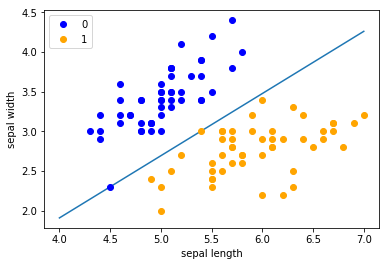

In [10]:
x_points = np.linspace(4, 7,10)
y_ = -(model.w[0]*x_points + model.b)/model.w[1]
plt.plot(x_points, y_)

plt.plot(X[:50, 0], X[:50, 1], 'bo', color='blue', label='0')
plt.plot(X[50:100, 0], X[50:100, 1], 'bo', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()